In [6]:
import pandas as pd
import sanity_checks_methods
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score
from time import time
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
import ML_algorithms

df = pd.read_csv('dataset/stroke_data.csv')

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])
df = df.dropna()
df = df[df['sex'] >= 0]

sanity_checks_methods.drop_negative_age(df)

Inserting 10% null values in feature avg_glucose_level

In [3]:
print('NULL COUNTS BEFORE INSERTING NULL VALUES')
print('-------------------------')
sanity_checks_methods.print_null_duplicates_values(df)

indices, original_values = sanity_checks_methods.add_null_values(df,'avg_glucose_level', 10)

print('\n NULL COUNTS AFTER INSERTING NULL VALUES')
print('-------------------------')
sanity_checks_methods.print_null_duplicates_values(df)

decision_tree = ML_algorithms.train_decision_tree_model(df)
ML_algorithms.k_fold_cross_validation_dt(decision_tree,df)

df.loc[indices, 'avg_glucose_level'] = original_values

NULL COUNTS BEFORE INSERTING NULL VALUES
-------------------------
total rows: 9999
Null Value Counts:
sex                  0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Percentage of Null Values:
sex                  0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64

Duplicate Counts:
0

Percentage of Duplicate Values:
0.0

Feature: sex
Null Count: 0
Null Percentage: 0.00%

Feature: age
Null Count: 0
Null Percentage: 0.00%

Feature: hypertension
Null Count: 0
Null Percentage: 0.00%

Feature: heart_disease
Null Count: 0
Null Percentage: 0.00%

Feature: ever_married
Null Coun

Inserting 10% null values in bmi feature

In [4]:
print('NULL COUNTS BEFORE INSERTING NULL VALUES IN BMI FEATURE')
print('-------------------------')
sanity_checks_methods.print_null_duplicates_values(df)

indices, original_values = sanity_checks_methods.add_null_values(df,'bmi', 10)

print('\n NULL COUNTS AFTER INSERTING NULL VALUES IN BMI VALUES')
print('-------------------------')
sanity_checks_methods.print_null_duplicates_values(df)

decision_tree = ML_algorithms.train_decision_tree_model(df)
ML_algorithms.k_fold_cross_validation_dt(decision_tree,df)

df.loc[indices, 'bmi'] = original_values

NULL COUNTS BEFORE INSERTING NULL VALUES IN BMI FEATURE
-------------------------
total rows: 9999
Null Value Counts:
sex                  0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Percentage of Null Values:
sex                  0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64

Duplicate Counts:
0

Percentage of Duplicate Values:
0.0

Feature: sex
Null Count: 0
Null Percentage: 0.00%

Feature: age
Null Count: 0
Null Percentage: 0.00%

Feature: hypertension
Null Count: 0
Null Percentage: 0.00%

Feature: heart_disease
Null Count: 0
Null Percentage: 0.00%

Feature: ever_ma

Inserting 10% null values in work_type feature

In [ ]:
print('NULL COUNTS BEFORE INSERTING NULL VALUES IN EVER_WORKED FEATURE')
print('-------------------------')
sanity_checks_methods.print_null_duplicates_values(df)

indices, original_values = sanity_checks_methods.add_null_values(df,'work_type', 10)

print('\n NULL COUNTS AFTER INSERTING NULL VALUES IN EVER_WORKED FEATURE')
print('-------------------------')
sanity_checks_methods.print_null_duplicates_values(df)

decision_tree = ML_algorithms.train_decision_tree_model(df)
ML_algorithms.k_fold_cross_validation_dt(decision_tree,df)

df.loc[indices, 'work_type'] = original_values

Inserting 10% of null values in the three most important features together (bmi, avg_glucose_level, work_type)

In [7]:
indices_dict = {}
original_values_dict = {}
features = [ 'bmi', 'avg_glucose_level', 'work_type']

for feature in features:
    indices, original_values = sanity_checks_methods.add_null_values(df,feature,10)
    indices_dict[feature] = indices
    original_values_dict[feature] = original_values

sanity_checks_methods.print_null_duplicates_values(df)

decision_tree = ML_algorithms.train_decision_tree_model(df)
ML_algorithms.k_fold_cross_validation_dt(decision_tree,df)

for feature in features:
    df.loc[indices_dict[feature], feature] = original_values_dict[feature]
    

total rows: 9999
Null Value Counts:
sex                    0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type            999
Residence_type         0
avg_glucose_level    999
bmi                  999
smoking_status         0
stroke                 0
dtype: int64

Percentage of Null Values:
sex                  0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            9.990999
Residence_type       0.000000
avg_glucose_level    9.990999
bmi                  9.990999
smoking_status       0.000000
stroke               0.000000
dtype: float64

Duplicate Counts:
0

Percentage of Duplicate Values:
0.0

Feature: sex
Null Count: 0
Null Percentage: 0.00%

Feature: age
Null Count: 0
Null Percentage: 0.00%

Feature: hypertension
Null Count: 0
Null Percentage: 0.00%

Feature: heart_disease
Null Count: 0
Null Percentage: 0.00%

Feature: ever_married

C:\Users\hp\AppData\Local\Temp\ipykernel_38108\3564855191.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 64.09  68.17  74.8  231.56 115.07 127.29 171.23 103.44  74.86  93.05
 240.09 215.69  71.22  73.18 185.17  59.32  88.51 127.29  91.54  78.88
 105.22  94.98  56.11  60.73  95.08  83.1   70.48  93.88  90.55  80.47
  76.82 191.82 228.56 103.35  88.2   70.3  200.59  56.87 128.72 221.89
  74.79  75.18  58.09 113.63  89.87 107.59  87.85  92.78 105.77 247.51
  74.63 205.35 183.34  58.37  79.53 175.29  59.52  80.28  76.93  92.13
  64.17  84.03  99.2   90.19  74.82 108.63  73.18  60.67 215.94  69.97
  82.39  71.42  87.39  67.29  84.47  78.03  64.64  68.53  81.95 108.56
  59.86  80.86 205.35  64.17  64.14  82.81  79.92 102.53  61.94  90.
 184.4   81.95 259.63  78.03  89.02 205.33 215.92 226.98 109.47  57.3
  68.53 196.71 109.47  82.81 104.05 103.68 148.91 102.16 175.29  75.56
  93.48 108.72 109.47 235.63 

inserting 30% of null values only in avg_glucose_level feature

In [ ]:
print('NULL COUNTS BEFORE INSERTING NULL VALUES')
print('-------------------------')
sanity_checks_methods.print_null_duplicates_values(df)

indices, original_values = sanity_checks_methods.add_null_values(df,'avg_glucose_level', 30)

print('\n NULL COUNTS AFTER INSERTING NULL VALUES')
print('-------------------------')
sanity_checks_methods.print_null_duplicates_values(df)

decision_tree = ML_algorithms.train_decision_tree_model(df)
ML_algorithms.k_fold_cross_validation_dt(decision_tree,df)

df.loc[indices, 'avg_glucose_level'] = original_values

inserting 30% of null values only in bmi feature

In [ ]:
print('NULL COUNTS BEFORE INSERTING NULL VALUES')
print('-------------------------')
sanity_checks_methods.print_null_duplicates_values(df)

indices, original_values = sanity_checks_methods.add_null_values(df,'bmi', 30)

print('\n NULL COUNTS AFTER INSERTING NULL VALUES')
print('-------------------------')
sanity_checks_methods.print_null_duplicates_values(df)

decision_tree = ML_algorithms.train_decision_tree_model(df)
ML_algorithms.k_fold_cross_validation_dt(decision_tree,df)

df.loc[indices, 'bmi'] = original_values

Inserting 30% of null values in work_type feature

In [ ]:
print('NULL COUNTS BEFORE INSERTING NULL VALUES')
print('-------------------------')
sanity_checks_methods.print_null_duplicates_values(df)

indices, original_values = sanity_checks_methods.add_null_values(df,'work_type', 30)

print('\n NULL COUNTS AFTER INSERTING NULL VALUES')
print('-------------------------')
sanity_checks_methods.print_null_duplicates_values(df)

decision_tree = ML_algorithms.train_decision_tree_model(df)
ML_algorithms.k_fold_cross_validation_dt(decision_tree,df)

df.loc[indices, 'work_type'] = original_values

Inserting 30% of null values in the three most important feature (bmi, avg_glucose_level, work_type)

In [ ]:
indices_dict = {}
original_values_dict = {}
features = [ 'bmi', 'avg_glucose_level', 'work_type']

for feature in features:
    indices, original_values = sanity_checks_methods.add_null_values(df,feature,30)
    indices_dict[feature] = indices
    original_values_dict[feature] = original_values

sanity_checks_methods.print_null_duplicates_values(df)

decision_tree = ML_algorithms.train_decision_tree_model(df)
ML_algorithms.k_fold_cross_validation_dt(decision_tree,df)

for feature in features:
    df.loc[indices_dict[feature], feature] = original_values_dict[feature]

Inserting 50% of null values only in avg_glucose_level feature

In [ ]:
print('NULL COUNTS BEFORE INSERTING NULL VALUES')
print('-------------------------')
sanity_checks_methods.print_null_duplicates_values(df)

indices, original_values = sanity_checks_methods.add_null_values(df,'avg_glucose_level', 30)

print('\n NULL COUNTS AFTER INSERTING NULL VALUES')
print('-------------------------')
sanity_checks_methods.print_null_duplicates_values(df)

decision_tree = ML_algorithms.train_decision_tree_model(df)
ML_algorithms.k_fold_cross_validation_dt(decision_tree,df)

df.loc[indices, 'avg_glucose_level'] = original_values

Inserting 50% of null values only in bmi feature

In [ ]:
print('NULL COUNTS BEFORE INSERTING NULL VALUES')
print('-------------------------')
sanity_checks_methods.print_null_duplicates_values(df)

indices, original_values = sanity_checks_methods.add_null_values(df,'bmi', 30)

print('\n NULL COUNTS AFTER INSERTING NULL VALUES')
print('-------------------------')
sanity_checks_methods.print_null_duplicates_values(df)

decision_tree = ML_algorithms.train_decision_tree_model(df)
ML_algorithms.k_fold_cross_validation_dt(decision_tree,df)

df.loc[indices, 'bmi'] = original_values

Inserting 50% of null values only in work_type feature

In [ ]:
print('NULL COUNTS BEFORE INSERTING NULL VALUES')
print('-------------------------')
sanity_checks_methods.print_null_duplicates_values(df)

indices, original_values = sanity_checks_methods.add_null_values(df,'work_type', 30)

print('\n NULL COUNTS AFTER INSERTING NULL VALUES')
print('-------------------------')
sanity_checks_methods.print_null_duplicates_values(df)

decision_tree = ML_algorithms.train_decision_tree_model(df)
ML_algorithms.k_fold_cross_validation_dt(decision_tree,df)

df.loc[indices, 'work_type'] = original_values

Inserting 50% of null values in the three most important feature (bmi, avg_glucose_level, work_type)

In [ ]:
indices_dict = {}
original_values_dict = {}
features = [ 'bmi', 'avg_glucose_level', 'work_type']

for feature in features:
    indices, original_values = sanity_checks_methods.add_null_values(df,feature,50)
    indices_dict[feature] = indices
    original_values_dict[feature] = original_values

sanity_checks_methods.print_null_duplicates_values(df)

print('DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
decision_tree = ML_algorithms.train_decision_tree_model(df)
ML_algorithms.k_fold_cross_validation_dt(decision_tree,df)

for feature in features:
    df.loc[indices_dict[feature], feature] = original_values_dict[feature]

Decision tree training and prediction followed by tree plot


Prestazioni sul Set di Addestramento:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      3451
           1       0.94      0.95      0.95      3548

    accuracy                           0.95      6999
   macro avg       0.95      0.95      0.95      6999
weighted avg       0.95      0.95      0.95      6999


Prestazioni sul Set di Test:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1548
           1       0.88      0.92      0.90      1452

    accuracy                           0.90      3000
   macro avg       0.90      0.90      0.90      3000
weighted avg       0.90      0.90      0.90      3000


Migliori Parametri: {'min_samples_split': 18, 'min_samples_leaf': 3, 'max_features': None, 'max_depth': 20, 'criterion': 'gini'}
Tempo impiegato per la Ricerca degli Iperparametri: 10.964884042739868 secondi
Tempo impiegato per l'Addestramento: 0.01664280891418457 secondi
Nod

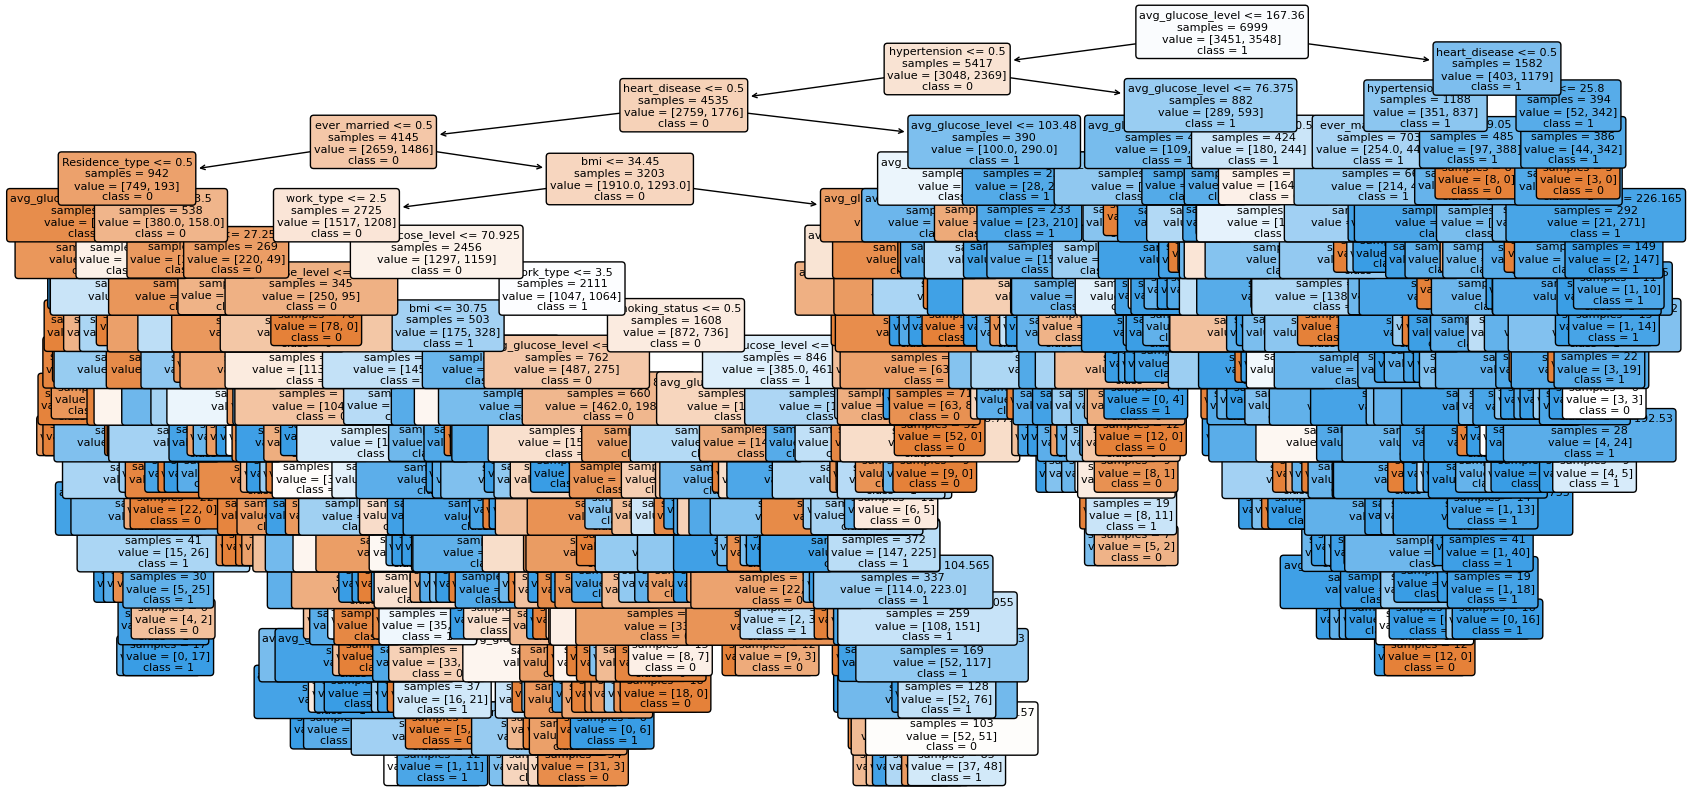

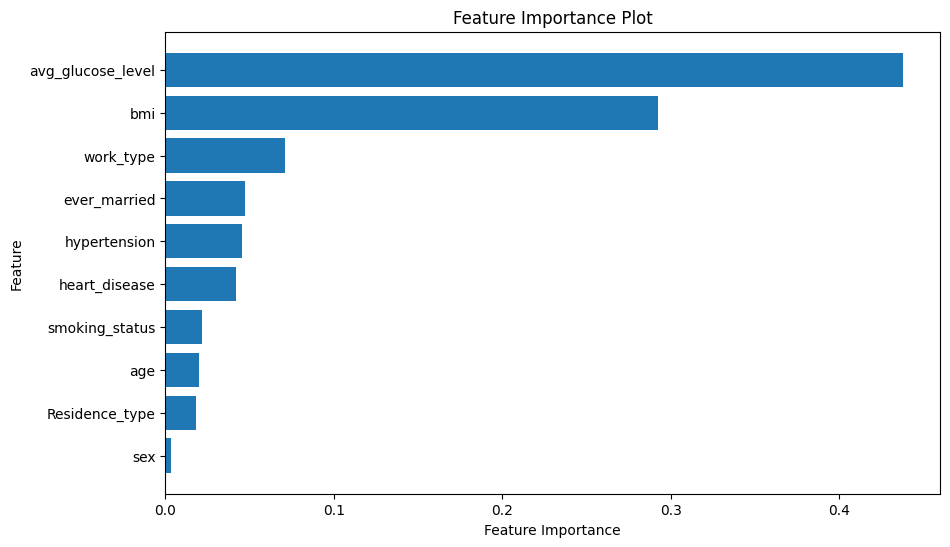

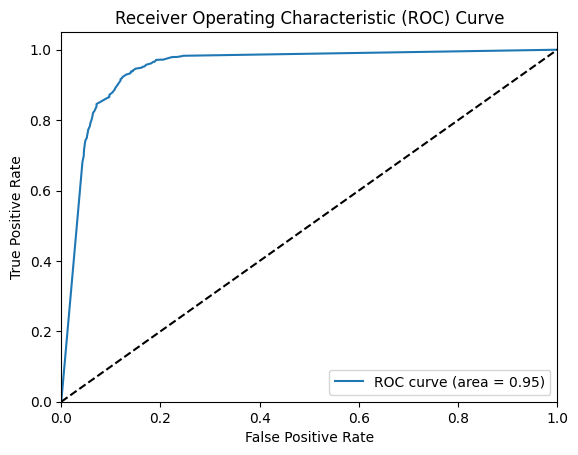

AUC Score: 0.9476305959524776
Accuracy for each fold: [0.9071428571428571, 0.8842857142857142, 0.8714285714285714, 0.8928571428571429, 0.9028571428571428, 0.8857142857142857, 0.8814285714285715, 0.8671428571428571, 0.8571428571428571, 0.9184549356223176]
Mean accuracy: 0.8868454935622317


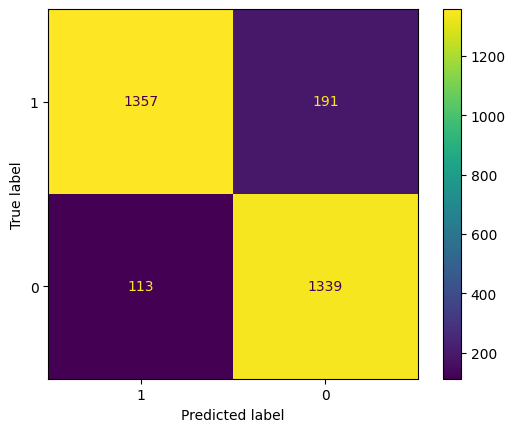

In [8]:
decision_tree = ML_algorithms.train_decision_tree_model(df)
ML_algorithms.k_fold_cross_validation_dt(decision_tree,df)

HistGradientBoosting

Fitting 5 folds for each of 50 candidates, totalling 250 fits
search time: 29.50854802131653
Best parameters found:  {'l2_regularization': 0.3, 'learning_rate': 0.2, 'max_depth': 4, 'max_iter': 497, 'min_samples_leaf': 4}
Best score on training data:  1.0
Classification Report on Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3451
           1       1.00      1.00      1.00      3548

    accuracy                           1.00      6999
   macro avg       1.00      1.00      1.00      6999
weighted avg       1.00      1.00      1.00      6999

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1548
           1       0.98      1.00      0.99      1452

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



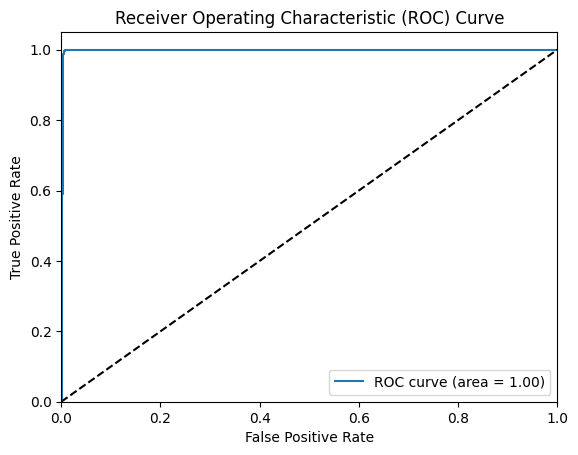

AUC Score: 0.9979619129989108


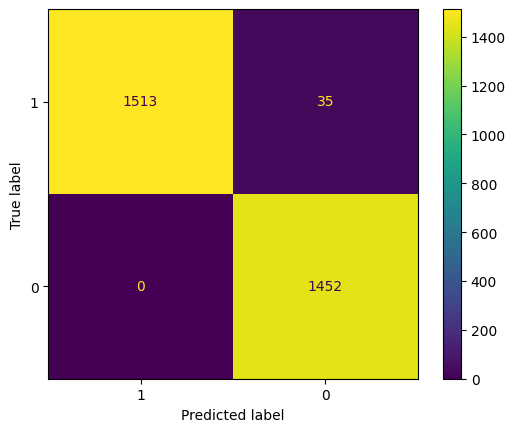

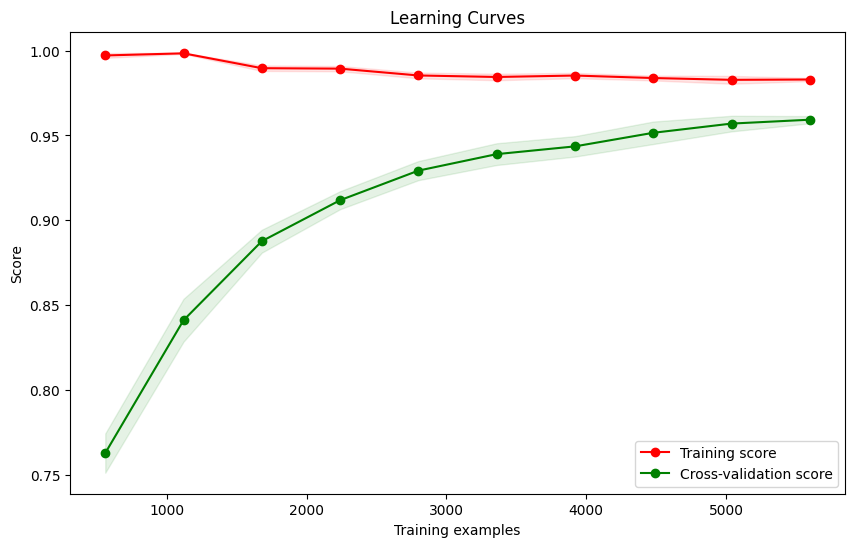

Accuracy for each fold: [0.9842857142857143, 0.9814285714285714, 0.9857142857142858, 0.98, 0.9871428571428571, 0.9885714285714285, 0.9814285714285714, 0.98, 0.9828571428571429, 0.9785407725321889]
Mean accuracy: 0.9829969343960758


In [2]:
hgb = ML_algorithms.train_hist_gradient_boosting_model(df)
ML_algorithms.k_fold_cross_validation_dt(hgb,df)